In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import cv2
import matplotlib.image as mpimg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/Butterfly Classification Contest'
train_image_path = dir_path+'/butterflies/train'
valid_image_path = '/content/drive/MyDrive/Colab Notebooks/Butterfly Classification Contest/butterflies/validation'
test_image_path = '/content/drive/MyDrive/Colab Notebooks/Butterfly Classification Contest/butterflies/test'

In [ ]:
len(os.listdir(train_image_path))

75

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.)

In [ ]:
def build_diff_model():
  IMG_SHAPE = (224, 224, 3)
  VGG16_MODEL=tf.keras.applications.VGG16(input_shape=IMG_SHAPE, include_top=False, weights='imagenet')
  VGG16_MODEL.trainable=False
  global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
  prediction_layer = tf.keras.layers.Dense(75,activation='softmax')

  model = tf.keras.Sequential([
    VGG16_MODEL,
    global_average_layer,
    prediction_layer
  ])

  model.compile(optimizer=tf.optimizers.Adam(), 
                loss=tf.keras.losses.categorical_crossentropy,
                metrics=["accuracy"])
  
  return model

In [ ]:
diff_model = build_diff_model()

train_generator = train_datagen.flow_from_directory(
        train_image_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        valid_image_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

diff_model.fit(
        train_generator,
        steps_per_epoch=50,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=20)

58889256/58889256 [==============================] - 2s 0us/step
Found 6124 images belonging to 75 classes.
Found 375 images belonging to 75 classes.
Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 4.3375 - accuracy: 0.0294 

50/50 [==============================] - 1306s 26s/step - loss: 4.3375 - accuracy: 0.0294 - val_loss: 4.1867 - val_accuracy: 0.0320
Epoch 2/5
50/50 [==============================] - 1027s 20s/step - loss: 4.0777 - accuracy: 0.0831
Epoch 3/5
50/50 [==============================] - 1020s 20s/step - loss: 3.9014 - accuracy: 0.1919
Epoch 4/5
50/50 [==============================] - 1030s 20s/step - loss: 3.7301 - accuracy: 0.2394
Epoch 5/5
50/50 [==============================] - 937s 19s/step - loss: 3.5467 - accuracy: 0.3625


In [ ]:
diff_model.fit(
        train_generator,
        steps_per_epoch=50,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=20)

Epoch 1/5
50/50 [==============================] - ETA: 0s - loss: 3.4018 - accuracy: 0.4056 

50/50 [==============================] - 1213s 24s/step - loss: 3.4018 - accuracy: 0.4056 - val_loss: 3.3771 - val_accuracy: 0.4240
Epoch 2/5
50/50 [==============================] - 971s 19s/step - loss: 3.2537 - accuracy: 0.4675
Epoch 3/5
50/50 [==============================] - 970s 19s/step - loss: 3.1471 - accuracy: 0.4837
Epoch 4/5
50/50 [==============================] - 956s 19s/step - loss: 3.0123 - accuracy: 0.5158
Epoch 5/5
50/50 [==============================] - 964s 19s/step - loss: 2.9026 - accuracy: 0.5688


# Testing Model by loading weights from save

In [ ]:
diff_model.save_weights('vgg16_weights_10_epochs.h5')
load_diff_model = build_diff_model()
load_diff_model.load_weights('vgg16_weights_10_epochs.h5')

In [ ]:
x, y = validation_generator.next()
print(tf.argmax(y[:10], axis=1))
# trained model
pred_model = diff_model.predict_on_batch(x[:10])
print(tf.argmax(pred_model, axis=1))
# weights loaded model
pred_load = load_diff_model.predict_on_batch(x[:10])
print(tf.argmax(pred_load, axis=1))

tf.Tensor([ 8 14 62 27 28 24 11 17 62 67], shape=(10,), dtype=int64)
tf.Tensor([29 39 62 27 28 11 11 66 13 44], shape=(10,), dtype=int64)
tf.Tensor([29 39 62 27 28 11 11 66 13 44], shape=(10,), dtype=int64)


# Testing

In [ ]:
diff_model.evaluate_generator(validation_generator)

In [ ]:
x, y = validation_generator.next()

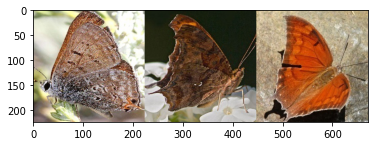

In [ ]:
plt.imshow(np.hstack(x[:3]))

In [ ]:
tf.argmax(y[:3], axis=1)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([22, 57, 68])>

In [ ]:
pred = diff_model.predict_on_batch(x[:3])

In [ ]:
tf.argmax(pred, axis=1)

<tf.Tensor: shape=(3,), dtype=int64, numpy=array([ 2, 57, 68])>

In [ ]:
validation_generator.class_indices

In [ ]:
label_list = os.listdir(train_image_path)
label_list = sorted(label_list)

## Testing csv images

In [ ]:
test_image_csv = pd.read_csv(dir_path + '/butterflies/Testing_set.csv')
test_image_csv['target'] = 0
test_image_csv.head()

,filename,target
0,Image_1.jpg,0
1,Image_2.jpg,0
2,Image_3.jpg,0
3,Image_4.jpg,0
4,Image_5.jpg,0


In [ ]:
test_image_path

'/content/drive/MyDrive/Colab Notebooks/Butterfly Classification Contest/butterflies/test'

In [ ]:
test_image_files = test_image_csv.iloc[:,0].to_numpy()
test_image_files

array(['Image_1.jpg', 'Image_2.jpg', 'Image_3.jpg', ..., 'Image_2784.jpg',
       'Image_2785.jpg', 'Image_2786.jpg'], dtype=object)

In [ ]:
for i in test_image_files:
  img_path = test_image_path + '/' + i

  img_bgr = cv2.imread(img_path)
  img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
  print(img_rgb.shape)

  pred = diff_model.predict(img_rgb)
  # print(pred)
  break

(224, 224, 3)


ValueError: ignored